# Home Vastu Prediction

<h3>Problem Statement</h3>

<p>The real estate market faces challenges in accurately assessing Vastu compliance, which influences property value and buyer decisions. This creates a need for a reliable, data-driven tool to help buyers and professionals make informed choices and avoid uncertainty.</p>

In [4]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

<h3>FUNCTION to generate dataset</h3>

In [6]:
def create_realistic_balanced_vastu_dataset(num_good=1000, num_bad=1000):
    
    good_data = {
        'Direction of Main Entrance': np.random.choice(['North', 'East'], num_good),
        'Position of Kitchen': np.random.choice(['Southeast'], num_good),
        'Position of Bedroom': np.random.choice(['Southwest', 'Northeast'], num_good),
        'Plot Shape': np.random.choice(['Square', 'Rectangular'], num_good),
        'Floor Number': np.random.randint(1, 6, num_good),
        'Is There an Open Space in the North-East?': np.random.choice(['Yes'], num_good),
        'Water Source in North-East': np.random.choice(['Yes'], num_good),
        'Presence of Heavy Objects in South-West': np.random.choice(['No'], num_good),
        'House Area (sq ft)': np.random.randint(1000, 4000, num_good),
        'Road Facing': np.random.choice(['North', 'East'], num_good),
    }
    
   
    bad_data = {
        'Direction of Main Entrance': np.random.choice(['South', 'West'], num_bad),
        'Position of Kitchen': np.random.choice(['Northwest', 'Southwest'], num_bad),
        'Position of Bedroom': np.random.choice(['Northwest', 'Southeast'], num_bad),
        'Plot Shape': np.random.choice(['Irregular'], num_bad),
        'Floor Number': np.random.randint(1, 6, num_bad),
        'Is There an Open Space in the North-East?': np.random.choice(['No'], num_bad),
        'Water Source in North-East': np.random.choice(['No'], num_bad),
        'Presence of Heavy Objects in South-West': np.random.choice(['Yes'], num_bad),
        'House Area (sq ft)': np.random.randint(500, 3000, num_bad),
        'Road Facing': np.random.choice(['South', 'West'], num_bad),
    }

    
    good_df = pd.DataFrame(good_data)
    bad_df = pd.DataFrame(bad_data)

# Adding Targer column in that
    good_df['Vastu'] = 'good'
    bad_df['Vastu'] = 'bad'

    
    df = pd.concat([good_df, bad_df], ignore_index=True)
    
# Shuffle the DataFrame to mix good and bad values
    df = df.sample(frac=1).reset_index(drop=True)
    
    return df


balanced_df = create_realistic_balanced_vastu_dataset()


balanced_df.to_csv('vastu_prediction_dataset.csv', index=False)


<h3>Retrieving data</h3>

In [8]:
df=pd.read_csv("vastu_prediction_dataset.csv")

In [9]:
df

,Direction of Main Entrance,Position of Kitchen,Position of Bedroom,Plot Shape,Floor Number,Is There an Open Space in the North-East?,Water Source in North-East,Presence of Heavy Objects in South-West,House Area (sq ft),Road Facing,Vastu
0,East,Southeast,Southwest,Square,5,Yes,Yes,No,3511,North,good
1,East,Southeast,Northeast,Square,2,Yes,Yes,No,3374,East,good
2,East,Southeast,Northeast,Rectangular,1,Yes,Yes,No,3055,North,good
3,West,Southwest,Southeast,Irregular,4,No,No,Yes,1069,West,bad
4,North,Southeast,Southwest,Square,1,Yes,Yes,No,1943,East,good
...,...,...,...,...,...,...,...,...,...,...,...
1995,North,Southeast,Northeast,Square,4,Yes,Yes,No,1446,North,good
1996,North,Southeast,Northeast,Square,1,Yes,Yes,No,3125,North,good
1997,North,Southeast,Southwest,Square,4,Yes,Yes,No,3053,North,good
1998,West,Southwest,Southeast,Irregular,4,No,No,Yes,522,West,bad


In [10]:
df["Vastu"].value_counts()

Vastu
good    1000
bad     1000
Name: count, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Direction of Main Entrance                 2000 non-null   object
 1   Position of Kitchen                        2000 non-null   object
 2   Position of Bedroom                        2000 non-null   object
 3   Plot Shape                                 2000 non-null   object
 4   Floor Number                               2000 non-null   int64 
 5   Is There an Open Space in the North-East?  2000 non-null   object
 6   Water Source in North-East                 2000 non-null   object
 7   Presence of Heavy Objects in South-West    2000 non-null   object
 8   House Area (sq ft)                         2000 non-null   int64 
 9   Road Facing                                2000 non-null   object
 10  Vastu                               

In [12]:
df.duplicated().sum()

5

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [15]:
df.describe()

,Floor Number,House Area (sq ft)
count,1995.000000,1995.000000
mean,3.045614,2127.332832
std,1.415427,880.470912
min,1.000000,504.000000
25%,2.000000,1426.500000
50%,3.000000,2096.000000
75%,4.000000,2764.000000
max,5.000000,3998.000000


In [16]:
df.isna().sum()

Direction of Main Entrance                   0
Position of Kitchen                          0
Position of Bedroom                          0
Plot Shape                                   0
Floor Number                                 0
Is There an Open Space in the North-East?    0
Water Source in North-East                   0
Presence of Heavy Objects in South-West      0
House Area (sq ft)                           0
Road Facing                                  0
Vastu                                        0
dtype: int64

In [17]:
list=df.describe().columns.tolist()
list

['Floor Number', 'House Area (sq ft)']

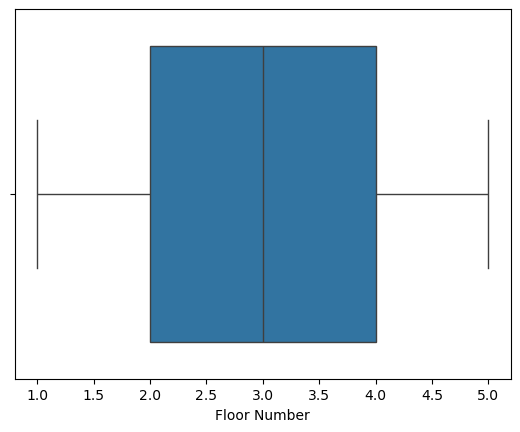

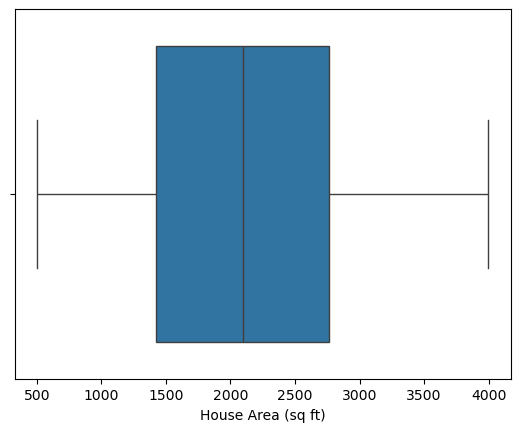

In [18]:
for col in list:
  sns.boxplot(x=df[col])
  plt.show()

<h3>Cheking Skewness</h3>

In [20]:
from scipy.stats import skew
for i in df.describe().columns:
    print(i,"---",skew(df[i]))   #-1 to 1 area Acceptable

Floor Number --- -0.04667483093623222
House Area (sq ft) --- 0.13399598359760026


<h3>Scalling</h3>

In [22]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [23]:
for i in df.describe().columns:
    df[i]=ms.fit_transform(df[[i]])

<h3>Again Check Skewness</h3>

In [25]:
from scipy.stats import skew
for i in df.describe().columns:
    print(i,"---",skew(df[i]))

Floor Number --- -0.04667483093623222
House Area (sq ft) --- 0.1339959835976003


<h3>Finding Value Count for each categorical column </h3>

In [27]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())

Direction of Main Entrance
East     511
West     509
South    489
North    486
Name: count, dtype: int64
Position of Kitchen
Southeast    997
Northwest    507
Southwest    491
Name: count, dtype: int64
Position of Bedroom
Northeast    514
Southeast    508
Northwest    490
Southwest    483
Name: count, dtype: int64
Plot Shape
Irregular      998
Rectangular    499
Square         498
Name: count, dtype: int64
Is There an Open Space in the North-East?
No     998
Yes    997
Name: count, dtype: int64
Water Source in North-East
No     998
Yes    997
Name: count, dtype: int64
Presence of Heavy Objects in South-West
Yes    998
No     997
Name: count, dtype: int64
Road Facing
West     532
East     503
North    494
South    466
Name: count, dtype: int64
Vastu
bad     998
good    997
Name: count, dtype: int64


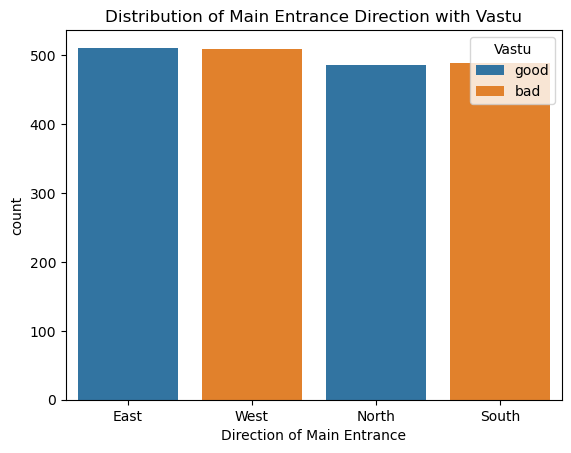

In [28]:
sns.countplot(data=df, x='Direction of Main Entrance', hue='Vastu')
plt.title('Distribution of Main Entrance Direction with Vastu')
plt.show()


<h2>Encoding</h2>

<h3>Label Encoding</h3>

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [32]:
df["Vastu"]=le.fit_transform(df["Vastu"])

In [33]:
df["Presence of Heavy Objects in South-West"]=le.fit_transform(df["Presence of Heavy Objects in South-West"])

In [34]:
df["Water Source in North-East"]=le.fit_transform(df["Water Source in North-East"])

In [35]:
df["Is There an Open Space in the North-East?"]=le.fit_transform(df["Is There an Open Space in the North-East?"])

In [36]:
df

,Direction of Main Entrance,Position of Kitchen,Position of Bedroom,Plot Shape,Floor Number,Is There an Open Space in the North-East?,Water Source in North-East,Presence of Heavy Objects in South-West,House Area (sq ft),Road Facing,Vastu
0,East,Southeast,Southwest,Square,1.00,1,1,0,0.860618,North,1
1,East,Southeast,Northeast,Square,0.25,1,1,0,0.821408,East,1
2,East,Southeast,Northeast,Rectangular,0.00,1,1,0,0.730109,North,1
3,West,Southwest,Southeast,Irregular,0.75,0,0,1,0.161706,West,0
4,North,Southeast,Southwest,Square,0.00,1,1,0,0.411849,East,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,North,Southeast,Northeast,Square,0.75,1,1,0,0.269605,North,1
1996,North,Southeast,Northeast,Square,0.00,1,1,0,0.750143,North,1
1997,North,Southeast,Southwest,Square,0.75,1,1,0,0.729536,North,1
1998,West,Southwest,Southeast,Irregular,0.75,0,0,1,0.005152,West,0


<h3>get_dummies Encoding</h3>

In [38]:
l2=df.select_dtypes("object").columns.tolist()
l2

['Direction of Main Entrance',
 'Position of Kitchen',
 'Position of Bedroom',
 'Plot Shape',
 'Road Facing']

In [39]:
df_dummies=pd.get_dummies(df,columns=['Direction of Main Entrance','Position of Kitchen','Position of Bedroom','Plot Shape','Road Facing']).astype(int)                             

In [40]:
df_dummies

,Floor Number,Is There an Open Space in the North-East?,Water Source in North-East,Presence of Heavy Objects in South-West,House Area (sq ft),Vastu,Direction of Main Entrance_East,Direction of Main Entrance_North,Direction of Main Entrance_South,Direction of Main Entrance_West,...,Position of Bedroom_Northwest,Position of Bedroom_Southeast,Position of Bedroom_Southwest,Plot Shape_Irregular,Plot Shape_Rectangular,Plot Shape_Square,Road Facing_East,Road Facing_North,Road Facing_South,Road Facing_West
0,1,1,1,0,0,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,0,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1996,0,1,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1997,0,1,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
1998,0,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1


<Axes: >

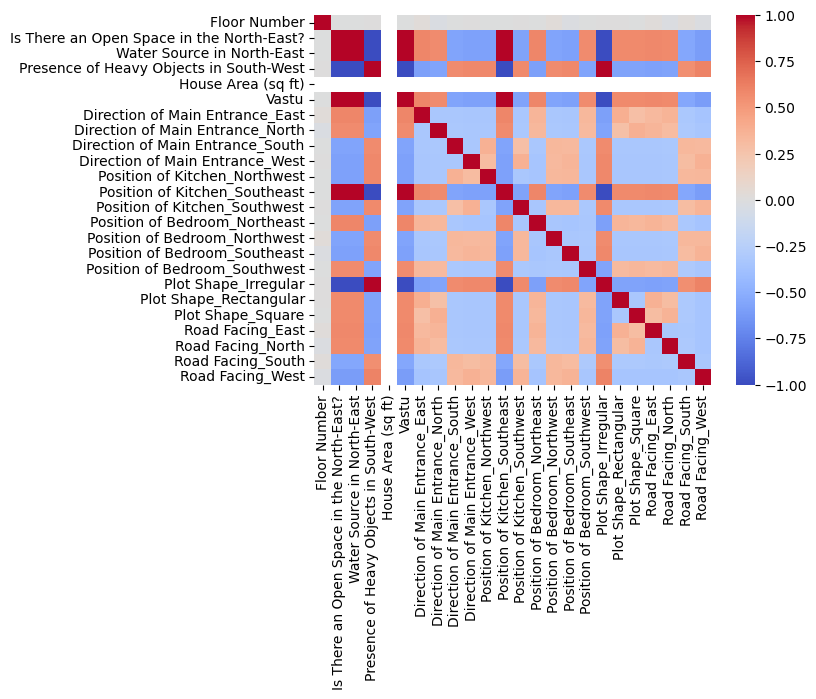

In [41]:
sns.heatmap(df_dummies.corr(),cmap='coolwarm',cbar=True)

<h3>Feature-target separation</h3>

In [43]:
x=df_dummies.drop("Vastu",axis=1)

In [44]:
x

,Floor Number,Is There an Open Space in the North-East?,Water Source in North-East,Presence of Heavy Objects in South-West,House Area (sq ft),Direction of Main Entrance_East,Direction of Main Entrance_North,Direction of Main Entrance_South,Direction of Main Entrance_West,Position of Kitchen_Northwest,...,Position of Bedroom_Northwest,Position of Bedroom_Southeast,Position of Bedroom_Southwest,Plot Shape_Irregular,Plot Shape_Rectangular,Plot Shape_Square,Road Facing_East,Road Facing_North,Road Facing_South,Road Facing_West
0,1,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1
4,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1996,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1997,0,1,1,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1998,0,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1


In [45]:
y=df_dummies["Vastu"]

In [46]:
y

0       1
1       1
2       1
3       0
4       1
       ..
1995    1
1996    1
1997    1
1998    0
1999    0
Name: Vastu, Length: 1995, dtype: int32

In [47]:
y.value_counts()

Vastu
0    998
1    997
Name: count, dtype: int64

<h3>Model Selection</h3>

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [51]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [52]:
dt=DecisionTreeClassifier(max_depth=10)

In [53]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [54]:
y_pred=dt.predict(x_test)

*Confusion Matrix
Confusion Matrix: 
 [[204   0]
 [  0 195]]
************************************************************


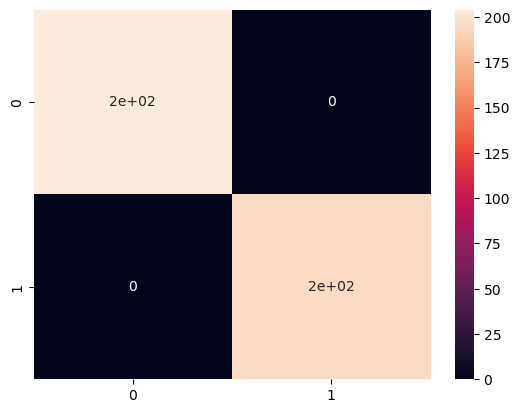

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       195

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399



In [55]:
print('*Confusion Matrix')
cn_matrix = confusion_matrix(y_pred,y_test)
print("Confusion Matrix: \n", cn_matrix)
print("*"*60)
sns.heatmap(cn_matrix,annot= True)
plt.show()
print(classification_report(y_pred,y_test))

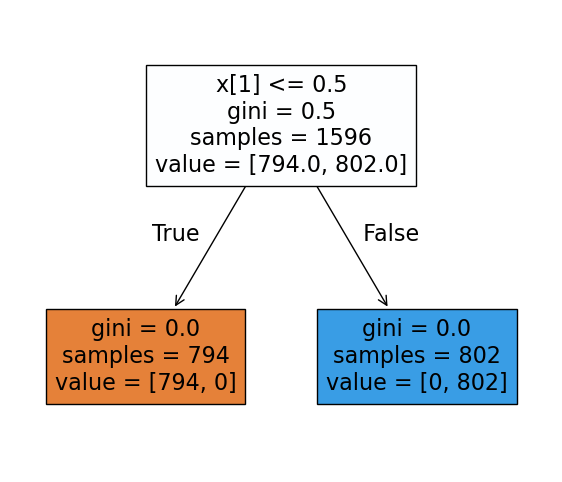

In [56]:
plt.figure(figsize=(7,6))
plot_tree(dt,filled=True)
plt.show()

<h3>#  Train the Random Forest Model</h3>

In [58]:
from sklearn.ensemble import RandomForestClassifier



In [59]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

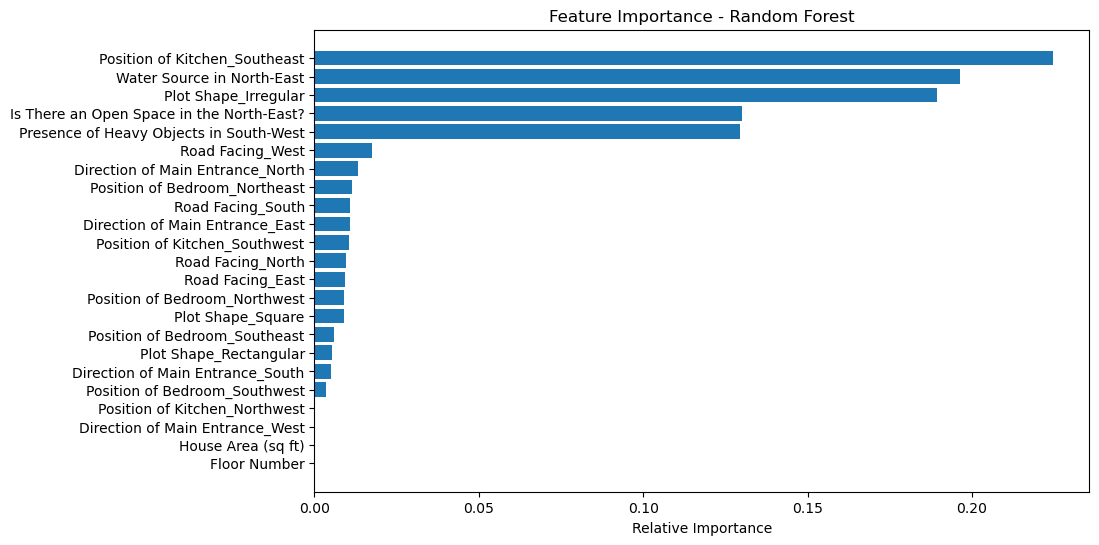

In [60]:
importances = rf_model.feature_importances_
features = x.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       204
           1       1.00      1.00      1.00       195

    accuracy                           1.00       399
   macro avg       1.00      1.00      1.00       399
weighted avg       1.00      1.00      1.00       399

Confusion Matrix:
 [[204   0]
 [  0 195]]
Accuracy Score: 100.0


<Axes: >

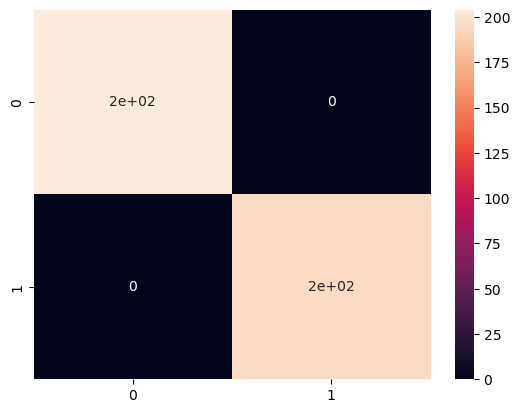

In [61]:
# Matrix of testing data
rf_predictions = rf_model.predict(x_test)
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("Accuracy Score:", accuracy_score(y_test, rf_predictions)*100)
sns.heatmap(confusion_matrix(y_test, rf_predictions),annot=True)


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       794
           1       1.00      1.00      1.00       802

    accuracy                           1.00      1596
   macro avg       1.00      1.00      1.00      1596
weighted avg       1.00      1.00      1.00      1596

Confusion Matrix:
 [[794   0]
 [  0 802]]
Accuracy Score: 100.0


<Axes: >

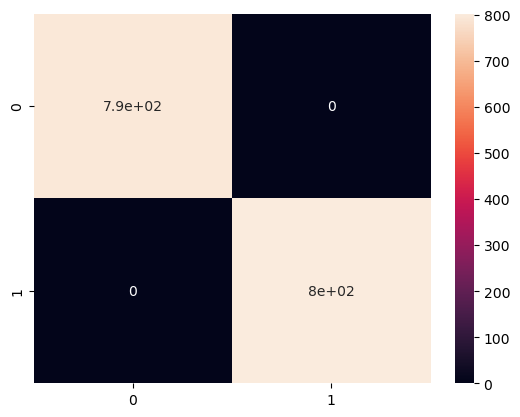

In [62]:
# Matrix of training data
rf_predictions = rf_model.predict(x_train)
print("\nRandom Forest Classification Report:")
print(classification_report(y_train, rf_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train, rf_predictions))
print("Accuracy Score:", accuracy_score(y_train, rf_predictions)*100)
sns.heatmap(confusion_matrix(y_train, rf_predictions),annot=True)

In [63]:
import pickle

# Save the trained model to a file
with open('vastu_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved as 'vastu_model.pkl'")


Model saved as 'vastu_model.pkl'


In [64]:
import pickle
import pandas as pd
model_columns = x_train.columns.tolist()

# Save these columns for later use
with open('model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)


In [65]:
from sklearn.svm import SVC


In [66]:
# Train and evaluate SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))


SVM Accuracy: 1.0
